<left><img width=100% height=100% src="img/itu_logo.png"></left>

## Lecture 05: Model Flexibility Choice, Overfitting, Underfitting 

### __Gül İnan__<br><br>Istanbul Technical University

## Train-Validation-Test Split Approach for Model Selection

Determinining the `flexibility (complexity) of a model` is called as **model selection**. 

For model selection:

 - **Step 1:** We should split our data set as `train`, `validation`, and `test` data. 

![](img/train_val_test1.png)

 - **Step 2:** Then, for a given flexibility level of the model, we should train our model on `training data` and compute the model's prediction performance (or error) on `validation data`. We should repeat the Step 2 for every possible value of model flexibility. 
 - **Step 3:**  We should select the **optimum** model flexibility value as the one which gives the highest prediction performance (or lower prediction error) on `validation data`.
 - Until now, we only estimated the optimum value of the model flexibility (no test data is involved up to this point).
 - **Step 4:** Afterwards, we should TRAIN the model with _optimum flexibility_ on `train+validation data` and use `test data` for final model evaluation. Through this way, we would avoid **data leakage**.

## Degree Choice for Polynomial Regression Models

Let's investigate how MSE train and MSE validation are changing in a polynomial regression model with different orders. In this sense, we should the split the data twice.

In [1]:
#let's re-generate the previous synthetic data set
from sklearn import set_config
set_config(transform_output="pandas")  

import numpy as np

np.random.seed(2023)

n = 100

#Generate X and y
X = np.linspace(0, 1, n).reshape(-1, 1)  #for scikit-learn, reshape the dimension
y = np.cos(1.5 * np.pi * X) + np.random.normal(0, 0.1, X.shape)

In [2]:
#split the data as bigtrain, test data
from sklearn.model_selection import train_test_split

#Split 90:10
X_bigtrain, X_test, y_bigtrain, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [3]:
#split as train data, val data
from sklearn.model_selection import train_test_split

#Split 50:50
X_train, X_val, y_train, y_val = train_test_split(X_bigtrain, y_bigtrain, test_size=0.5, random_state=2023)

In [4]:
#we need indices for plots below
train_indices = np.argsort(X_train.flatten()) #flatten removes column index
val_indices = np.argsort(X_val.flatten())  

In [5]:
import pandas as pd

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

p_order = np.arange(1,14)

results = {}


for i in range(len(p_order)):
    
    pipe = make_pipeline(
    PolynomialFeatures(degree=p_order[i], include_bias=False), #model flexibility (complexity)
    LinearRegression()
    )
    
    #print(i)
    
    pipe.fit(X_train, y_train)
    
    r2_train = pipe.score(X_train, y_train)
    r2_val = pipe.score(X_val, y_val)
    
    y_train_pred = pipe.predict(X_train)
    y_val_pred = pipe.predict(X_val)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_val = mean_squared_error(y_val, y_val_pred)
    
    
    results[i] = {'p': p_order[i],
                 'R2_Train': r2_train, 
                 'R2_Val': r2_val, 
                 'MSE_Train': mse_train*10,   #multiplied by a constant to increase visibility
                 'MSE_Val': mse_val*10,  #multiplied by a constant to increase visibility
                  }
    
res_df = pd.DataFrame.from_dict(results).T
res_df

,p,R2_Train,R2_Val,MSE_Train,MSE_Val
0,1.0,0.429408,0.517221,1.981337,2.373571
1,2.0,0.916213,0.895578,0.290943,0.513390
2,3.0,0.955600,0.960335,0.154174,0.195014
3,4.0,0.968375,0.970715,0.109816,0.143979
4,5.0,0.973785,0.966515,0.091030,0.164629
5,6.0,0.974086,0.965395,0.089984,0.170136
6,7.0,0.974558,0.964184,0.088345,0.176090
7,8.0,0.976352,0.970973,0.082115,0.142712
8,9.0,0.976422,0.969320,0.081871,0.150835
9,10.0,0.976868,0.942679,0.080324,0.281818


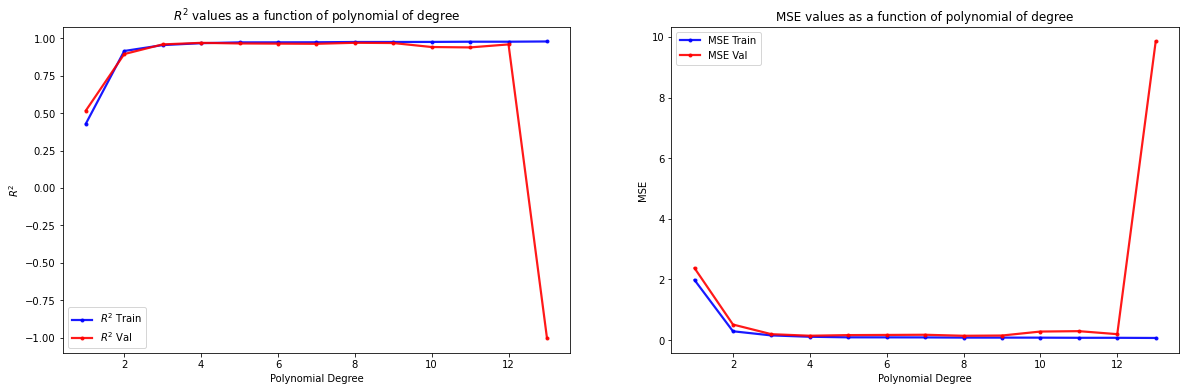

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 6]

fig, (ax1, ax2) = plt.subplots(1, 2)

#Left plot
ax1.plot(p_order, res_df.R2_Train, color='blue', marker='.', alpha=0.9, linewidth=2.2)
ax1.plot(p_order, res_df.R2_Val, color='red', marker='.', alpha=0.9, linewidth=2.2)   
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('$R^2$')
ax1.legend(['$R^2$ Train', '$R^2$ Val'])
ax1.set_title("$R^2$ values as a function of polynomial of degree")

#Right plot
ax2.plot(p_order, res_df.MSE_Train, color='blue', marker='.', alpha=0.9, linewidth=2.2)
ax2.plot(p_order, res_df.MSE_Val, color='red', marker='.', alpha=0.9, linewidth=2.2)
ax2.set_xlabel('Polynomial Degree')
ax2.set_ylabel('MSE')
ax2.legend(['MSE Train', 'MSE Val'])
ax2.set_title("MSE values as a function of polynomial of degree")
plt.show();

## Monitoring Prediction Error Curves for Model Choice

Typical behaviour of a model's prediction error on the training data and the validation data as a function of model complexity can be depicted below:

<br>
<br>
<left><img width=100% height=100% src="img/under_over_fitting2.png"></left>


<br>

Generally, as model **complexity increases**, training performance improves (**training error decreases**) since complex structured models can explain the training data better.

An opposite phenomenon is that models with **low complexity** are **not able to describe the data well**.

The combination of `Training Error, Validation Error`, and the `the difference` allows one to seek a `balance` between
two competing negative attributes:

• `Over-fitting` and

• `Under-fitting`.

## Overfitting

* We typically say the model `over-fits` the data if the model predicts
accurately on the training data but does not generalize well to
other unseen examples, that is, if `the training error is small` but the
`validation error is large`.
* For example, a high degree polynomial model (here model complexity is the degree of the polynomial) may fit the training data perfectly.
However, the model may also make wildly incorrect prediction outside this dataset, and doesn't generalize well.

## Underfitting

* We say the model `under-fits` the data if the `training error is
relatively large` (and in this case, typically the validation error is also
relatively large.)

* For example, a low degree polynomial model (e.g. a straight line) may not fit the training data well. Validation data is similar to training data, so it will not be accurate either.

<!-- __Underfitting__: On one hand, if the model is too small (like the linear model in the above example), it will not generalize well to unseen data because it is not sufficiently complex to fit the true structure of the dataset.

__Overfitting__: On the other hand, if the model is too expressive (like a high degree polynomial), we are going to fit the training dataset perfectly; however, the model will make wildly incorrect prediction at points right outside this dataset, and will also not generalize well to unseen data. -->

Finding the `tradeoff between overfitting and underfitting` is one of the main challenges in applying machine learning algorithms.

<!--
## Overfitting vs. Underfitting: Evaluation

We can measure overfitting and underfitting by estimating prediction performance on test data and comparing it to the training data.
* If training performance is high but test performance is low, we are overfitting.
* If training performance is low but test performance is low, we are underfitting.-->

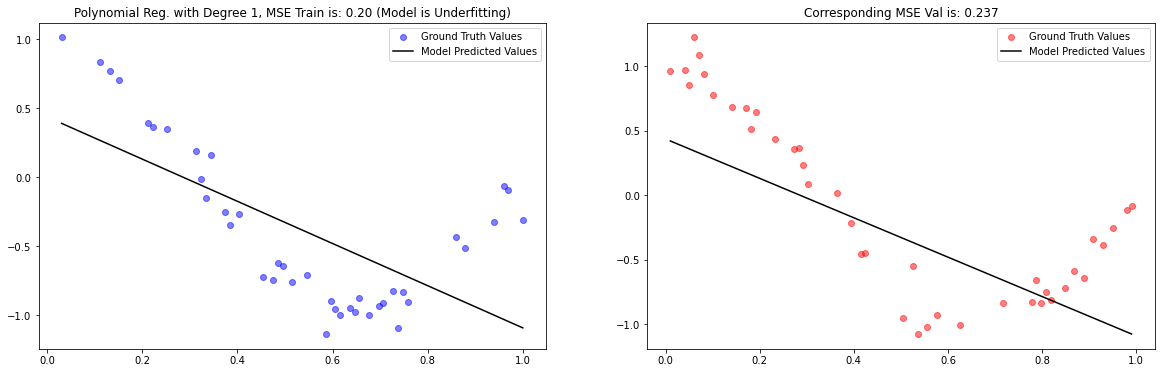

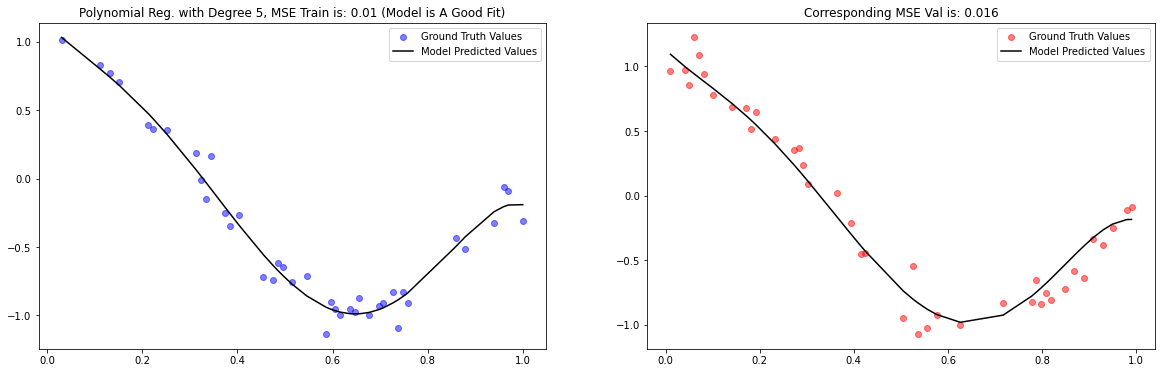

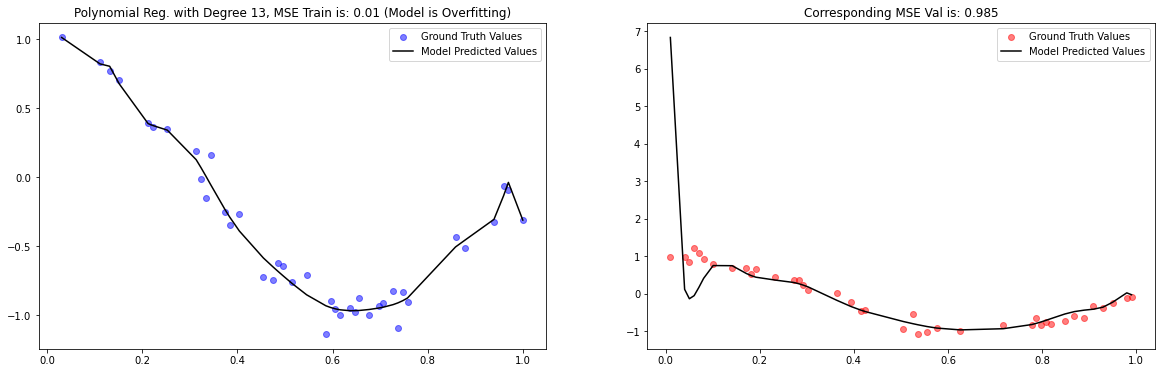

In [7]:
import pandas as pd 

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 6]

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


p_order = [1, 5, 13]
titles = ['Underfitting', 'A Good Fit', 'Overfitting']

for i in range(len(p_order)):
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    pipe = make_pipeline(
    PolynomialFeatures(degree=p_order[i], include_bias=False), 
    LinearRegression()
    )
    
    #print(i)
    
    pipe.fit(X_train, y_train)
    
    r2_train = pipe.score(X_train,y_train)
    r2_val = pipe.score(X_val, y_val)
    
    y_train_pred = pipe.predict(X_train)
    y_val_pred = pipe.predict(X_val)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_val = mean_squared_error(y_val, y_val_pred)
    
    #indices comes from the previous block
    
    #Left plot
    ax1.scatter(X_train[train_indices], y_train[train_indices], color='blue', alpha=0.5, label="Train samples")    
    ax1.plot(X_train[train_indices], y_train_pred[train_indices], color='black', label="Predicted Model")
    ax1.set_title("Polynomial Reg. with Degree %.f, MSE Train is: %.2f (Model is %s)" % (p_order[i], mse_train, titles[i]))
    ax1.legend(['Ground Truth Values', 'Model Predicted Values'])
    
    #Right plot
    ax2.scatter(X_val[val_indices], y_val[val_indices], color='red', alpha=0.5, label="Validation samples")    
    ax2.plot(X_val[val_indices], y_val_pred[val_indices], color='black', label="Predicted Model")
    ax2.set_title("Corresponding MSE Val is: %.3f" % (mse_val))
    ax2.legend(['Ground Truth Values', 'Model Predicted Values'])
    plt.show();

Degree 5 seems the optimum. Find the final prediction performance on the test data.

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


pipe = make_pipeline(PolynomialFeatures(degree=5, include_bias=False), 
                     LinearRegression())

pipe.fit(X_bigtrain, y_bigtrain)

y_test_pred = pipe.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)    

In [9]:
print("MSE on Test data: %0.4f" % mse_test)

MSE on Test data: 0.0120


The built model's generalization error on the test is  0.0120.

## Dealing with Underfitting

Balancing overfitting vs. underfitting is a major challenges in applying machine learning. Briefly, here are some approaches:
* To fight under-fitting, we may increase our model class to encompass more expressive models.
* We may also create richer features for the data that will make the dataset easier to fit.

## Dealing with Overfitting

We will see many ways of dealing with overftting, but here are some ideas:
* If we're overfitting, we may reduce the complexity of our model by reducing the size of model.
* We may also modify our objective to penalize complex models that may overfit the data.

## References

- James, G., Witten, D., Hastie, T., Tibshirani, R., James, G., Witten, D., and Tibshirani, R. (2021). Statistical learning. An introduction to statistical learning: with applications in R. https://www.statlearning.com/

- https://github.com/kuleshov/cornell-cs5785-2020-applied-ml/tree/main/notebooks

In [10]:
import session_info
session_info.show()